#  Earthquake-Nuclear-Explosion

This notebook try to classfiy between ('Earthquake', 'Nuclear Explosion') according to their depth and magntiude

# Import package

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sys
%matplotlib inline
import os
os.environ["PROJ_LIB"] = "C:\\Utilities\\Python\\Anaconda\\Library\\share"; #fixr
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
from IPython.display import HTML
from datetime import datetime
import io
import base64
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
import statsmodels.api as sm
import sklearn
import datetime 
import graphviz
import pandas_profiling
import joblib
import matplotlib as mpl
import os
import shutil
%matplotlib inline
#from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation



from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import ticker
#from streamlit_pandas_profiling import st_profile_report
from pandas_profiling import ProfileReport
from pandas import DataFrame
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
#from mlxtend.evaluate import bias_variance_decomp
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV
from sklearn.feature_selection import r_regression, SelectKBest, SelectPercentile
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.base import BaseEstimator,TransformerMixin
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.exceptions import ConvergenceWarning
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils._testing import ignore_warnings
from tabulate import tabulate
from xgboost import XGBClassifier
from datetime import datetime
from datetime import date
from datetime import time
from IPython.display import HTML
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import dbscan
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.exceptions import ConvergenceWarning
import io
import base64


# Load and Analysis

In [30]:
data = pd.read_csv("database.csv")
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Feature selection 

These columns have been dropped due to they didn't has any effect in classifier:

('Date','Time','Depth Error','Depth Seismic Stations','Magnitude Type','Magnitude Seismic Stations','Horizontal Error','ID','Source','Location Source','Magnitude Source','Status')

In [31]:
dataD=data.drop(labels=['Date','Time','Depth Error','Depth Seismic Stations','Magnitude Type','Magnitude Seismic Stations','Horizontal Error','ID','Source','Location Source','Magnitude Source','Status'],axis=1)
dataD

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Error,Azimuthal Gap,Horizontal Distance,Root Mean Square
0,19.2460,145.6160,Earthquake,131.60,6.0,NaN,NaN,NaN,NaN
1,1.8630,127.3520,Earthquake,80.00,5.8,NaN,NaN,NaN,NaN
2,-20.5790,-173.9720,Earthquake,20.00,6.2,NaN,NaN,NaN,NaN
3,-59.0760,-23.5570,Earthquake,15.00,5.8,NaN,NaN,NaN,NaN
4,11.9380,126.4270,Earthquake,15.00,5.8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
23407,38.3917,-118.8941,Earthquake,12.30,5.6,0.320,42.47,0.120,0.1898
23408,38.3777,-118.8957,Earthquake,8.80,5.5,0.260,48.58,0.129,0.2187
23409,36.9179,140.4262,Earthquake,10.00,5.9,NaN,91.00,0.992,1.5200
23410,-9.0283,118.6639,Earthquake,79.00,6.3,NaN,26.00,3.553,1.4300


# EDA

2023-02-01 22:57:46.248 WARNING matplotlib.legend: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


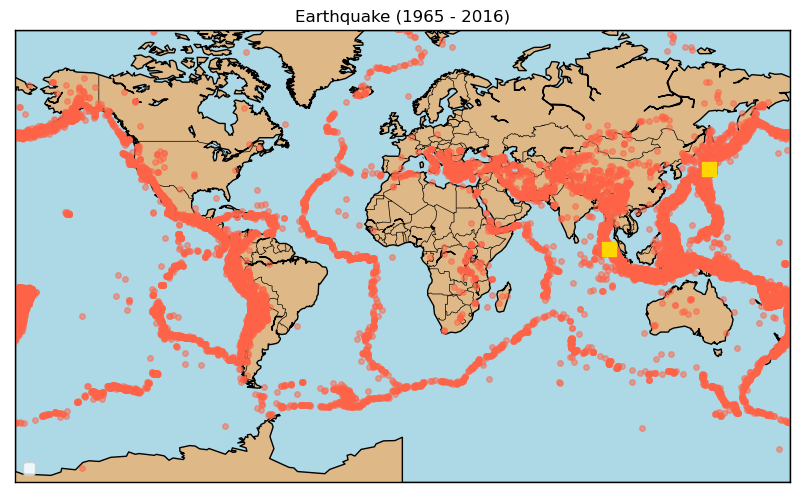

2023-02-01 22:58:22.811 WARNING matplotlib.legend: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


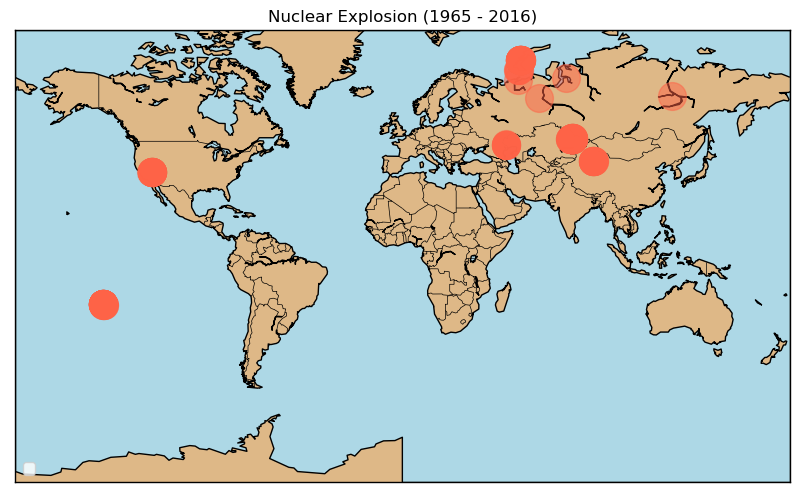

In [34]:
def creat_map(Type, size = 4):
    fig = plt.figure(figsize=(10, 10))
    m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
    m.bluemarble()
    m.drawmapboundary(fill_color='lightblue')

    x, y = m(list(data[data.Type == Type].Longitude), list(data[data.Type == Type].Latitude))
    points = m.plot(x, y, "o", markersize = size, color = 'tomato', alpha = .5)
    if Type is 'Earthquake':
        a,b = m(list(data[(data.Type == Type) & (data.Magnitude == data.Magnitude.max())].Longitude), list(data[(data.Type == Type) & (data.Magnitude == data.Magnitude.max())].Latitude))
        points = m.plot(a, b, "s", markersize = 10, color = 'gold', alpha = 1)

    plt.title("{} (1965 - 2016)".format(Type))
    plt.legend(loc ='lower left', prop= {'size':11})
    plt.show()
creat_map('Earthquake')
creat_map('Nuclear Explosion', size = 20)

<AxesSubplot:xlabel='Magnitude', ylabel='Type'>

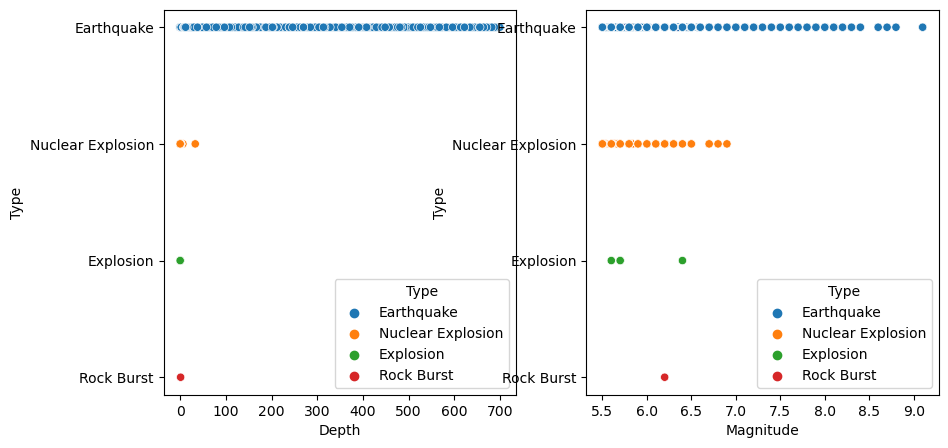

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10,5)) # plot 2 graphs
sns.scatterplot(x='Depth',y = 'Type', hue='Type', data=data, ax=axes[0])
sns.scatterplot(x ='Magnitude', y = 'Type',hue ='Type', data = data, ax=axes[1])

Due to the rare data of Rock brust and Explosion these events will be droped


In [111]:
dataD.drop(dataD[(dataD['Type'] == 'Explosion') | (dataD['Type'] == 'Rock Burst')].index, inplace=True)

dataD

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Error,Azimuthal Gap,Horizontal Distance,Root Mean Square
0,19.2460,145.6160,Earthquake,131.60,6.0,NaN,NaN,NaN,NaN
1,1.8630,127.3520,Earthquake,80.00,5.8,NaN,NaN,NaN,NaN
2,-20.5790,-173.9720,Earthquake,20.00,6.2,NaN,NaN,NaN,NaN
3,-59.0760,-23.5570,Earthquake,15.00,5.8,NaN,NaN,NaN,NaN
4,11.9380,126.4270,Earthquake,15.00,5.8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
23407,38.3917,-118.8941,Earthquake,12.30,5.6,0.320,42.47,0.120,0.1898
23408,38.3777,-118.8957,Earthquake,8.80,5.5,0.260,48.58,0.129,0.2187
23409,36.9179,140.4262,Earthquake,10.00,5.9,NaN,91.00,0.992,1.5200
23410,-9.0283,118.6639,Earthquake,79.00,6.3,NaN,26.00,3.553,1.4300


In [113]:
dataD.Type.unique()

array(['Earthquake', 'Nuclear Explosion'], dtype=object)

<AxesSubplot:xlabel='Type', ylabel='Magnitude'>

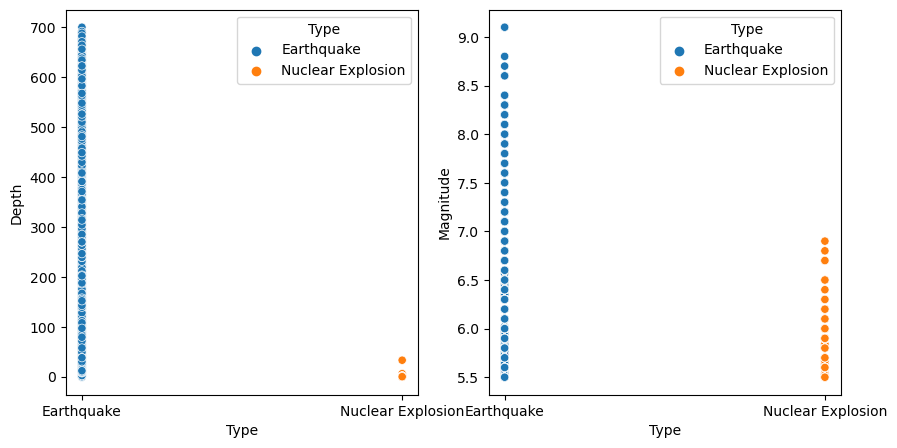

In [136]:
fig, axes = plt.subplots(1, 2, figsize=(10,5)) # plot 2 graphs
sns.scatterplot(x = 'Type', y='Depth', hue='Type', data=dataD, ax=axes[0])
sns.scatterplot( x = 'Type', y ='Magnitude',hue ='Type', data = dataD, ax=axes[1])

Text(0.5, 1.0, '% Type of Events')

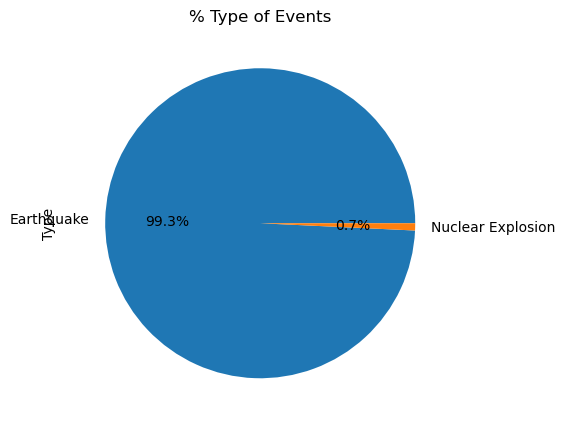

In [114]:
dataD['Type'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(5,8));
plt.title("% Type of Events")

Due to the unbalance data oversampling SMOTE technique has been used.

In [115]:
## Encoder data 
le = LabelEncoder()
data_LE = dataD.apply(le.fit_transform)
data_LE.head()

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Error,Azimuthal Gap,Horizontal Distance,Root Mean Square
0,14680,16282,0,1670,28,100,1109,1448,190
1,11585,13415,0,1180,19,100,1109,1448,190
2,4819,2000,0,450,31,100,1109,1448,190
3,344,7644,0,359,19,100,1109,1448,190
4,13394,13045,0,359,19,100,1109,1448,190


# Data Imbalance Adjustment

## Oversampling

In [116]:
y.unique

<bound method Series.unique of 0        0
1        0
2        0
3        0
4        0
        ..
23407    0
23408    0
23409    0
23410    0
23411    0
Name: Type, Length: 23407, dtype: int32>

In [117]:
x=data_LE.drop(labels=['Type'],axis=1)
#x = data.drop('type', axis=1)
y = data_LE['Type']

In [118]:
# oversampling using SMOTE
smote = SMOTE(random_state=0)
x_smote, y_smote = smote.fit_resample(x, y)
counter = Counter(y)
print(counter)
counter = Counter(y_smote)
print(counter)
print(x.shape)
print(x_smote.shape)

Counter({0: 23232, 1: 175})
Counter({0: 23232, 1: 23232})
(23407, 8)
(46464, 8)


In [119]:
# create a new dataframe for SMOTE
df_smote = x_smote.copy(deep=True)
df_smote['type'] = y_smote
df_smote

,Latitude,Longitude,Depth,Magnitude,Magnitude Error,Azimuthal Gap,Horizontal Distance,Root Mean Square,type
0,14680,16282,1670,28,100,1109,1448,190,0
1,11585,13415,1180,19,100,1109,1448,190,0
2,4819,2000,450,31,100,1109,1448,190,0
3,344,7644,359,19,100,1109,1448,190,0
4,13394,13045,359,19,100,1109,1448,190,0
...,...,...,...,...,...,...,...,...,...
46459,19156,9563,3,15,100,1109,1448,102,1
46460,17086,3453,11,21,90,1089,1448,53,1
46461,19216,9651,3,25,100,1109,1448,190,1
46462,19155,9584,3,28,100,1109,1448,98,1


Text(0.5, 1.0, '% type')

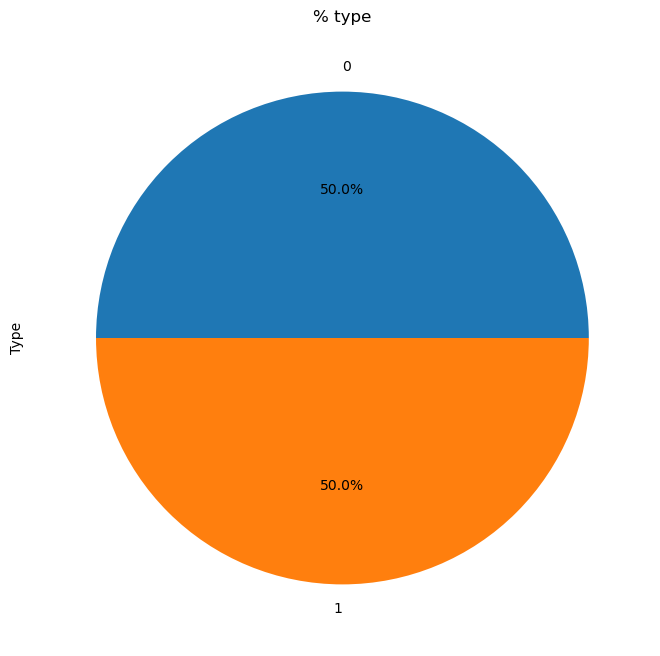

In [120]:
y_smote.value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% type")

Machine learning techniques have been used to classify between Earthquake and nuclear explosions for base data and smote date

# Model Creation

In [121]:
ts = 0.2
rs = 1
x_train_base, x_test_base, y_train_base, y_test_base = train_test_split(
    x, y, test_size=ts, random_state=rs)

x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(
    x_smote, y_smote, test_size=ts, random_state=rs)

In [122]:
# build the classifier class
# import ray
# # ray.init(ignore_reinit_error=True)

# # @ray.remote
# @ignore_warnings(category=ConvergenceWarning)
class ClassifierModels():
    def __init__(self, df, x, y, x_test, y_test):
        '''Init function. Make sure to pass x_train and y_train here.'''

        self.df = df
        self.x = x
        self.y = y
        self.x_test = x_test
        self.y_test = y_test

        print('#' * 60)
        print(f'{" Loading dataframe ":#^60}')
        print('#' * 60)
        print(f'{" Getting best parameters to create our models ":#^60}')
        print('#' * 60)

        # hold abbreviations and full names
        self.model_abr = {'lr': 'Logistic Regression', 'knn': 'KNeighbors Classifier', 'dtc': 'Decision Tree Classifier',
                          'rfc': 'Random Forest Classifier', 'ensemble': 'Voting Classifier', 'xgb': 'XGB Classifier', 'nb': 'Naive Bayes'}
        # self.model_abr = {'lr': 'Logistic Regression', 'svm': 'Support Vector Machine', 'dtc': 'Decision Tree Classifier',
        #                   'rfc': 'Random Forest Classifier', 'ensemble': 'Voting Classifier', 'xgb': 'XGB Classifier', 'nb': 'Naive Bayes'}
        
        # hold the actual models
        self.models = {}
        self.model_predicts = {}
        self.model_predicts_proba = {}

        # loop over the models dict to get each model's best params
        for model in self.model_abr:
            print('#' * 60)
            print(f'{" " + self.model_abr[model] + " ":#^60}')
            print('#' * 60)
            # params = self.get_best_params(model)

            # print('+++++ Best parameters for the {} model: {}'.format(
            #     self.model_abr[model], params))
            print('+++++ Creating and fitting the {} model using its default parameters...'.format(
                self.model_abr[model]))

            if model == 'lr':
                # m = LogisticRegression(
                #     solver=params['solver'], penalty=params['penalty'], C=params['C'])
                m = LogisticRegression(solver='lbfgs', max_iter=500, n_jobs=-1)
                m.fit(self.x, self.y)
                self.models[model] = m

            elif model == 'knn':
                # m = KNeighborsClassifier(
                #     n_neighbors=params['n_neighbors'], weights=params['weights'], metric=params['metric'])
                m = KNeighborsClassifier(n_jobs=-1)
                m.fit(self.x, self.y)
                self.models[model] = m
                
            elif model == 'svm':
                # m = SVC(kernel=params['kernel'],
                #         C=params['C'], gamma=params['gamma'], probability=True)
                m = SVC(n_jobs=-1, probability=True)
                m.fit(self.x, self.y)
                self.models[model] = m

            elif model == 'dtc':
                # m = DecisionTreeClassifier(
                #     criterion=params['criterion'], splitter=params['splitter'], max_features=params['max_features'])
                m = DecisionTreeClassifier()
                m.fit(self.x, self.y)
                self.models[model] = m

            elif model == 'rfc':
                # m = RandomForestClassifier(
                #     n_estimators=params['n_estimators'], max_features=params['max_features'])
                m = RandomForestClassifier(n_jobs=-1)
                m.fit(self.x, self.y)
                self.models[model] = m

            elif model == 'ensemble':
                # m = VotingClassifier(estimators=[('Logistic Regression', self.models['lr']), ('Decission Tree Classifier', self.models['dtc']), (
                #     'Random Forrest Classifier', self.models['rfc']), ('KNN', self.models['knn']), ('SVM', self.models['svm'])], weights=[10, 10, 10, 10, 10], voting='soft')
                m = VotingClassifier(estimators=[('Logistic Regression', self.models['lr']), ('Decission Tree Classifier', self.models['dtc']), (
                    'Random Forrest Classifier', self.models['rfc']), ('KNN', self.models['knn'])], weights=[10, 10, 10, 10], voting='soft', n_jobs=-1)
                m.fit(self.x, self.y)
                self.models[model] = m
                
            elif model == 'xgb':
                m = XGBClassifier(use_label_encoder=False, n_jobs=-1)
                m.fit(self.x, self.y)
                self.models[model] = m

            elif model == 'nb':
                m = GaussianNB()
                m.fit(self.x, self.y)
                self.models[model] = m

        print('#' * 60)
        print(f'{" All models created and fitted successfully! ":#^60}')
        print('#' * 60)

        # loop over the models and get the y_pred
        for model in self.model_abr:
            y_pred = self.models[model].predict(self.x_test)
            self.model_predicts[model] = y_pred

        # loop over the models and get the y_pred_proba
        for model in self.model_abr:
            y_pred_proba = self.models[model].predict_proba(self.x_test)
            self.model_predicts_proba[model] = y_pred_proba
            
        print('#' * 60)
        print(f'{" All model predictions generated successfully! ":#^60}')
        print('#' * 60)

    @ignore_warnings(category=ConvergenceWarning)
    def get_best_params(self, model):
            #'''This method returns the best params for hypertuning each model'''

        if model == 'lr':
            # model
            lr_model = LogisticRegression()

            # params
            solver = ['newton-cg', 'lbfgs', 'liblinear']
            penalty = ['l2']
            C = [100, 10, 1.0, 0.1, 0.01]
            lr_params = dict(solver=solver, penalty=penalty, C=C)

            # cross validation
            cv = RepeatedStratifiedKFold(
                n_splits=2, n_repeats=1, random_state=1)
            lr_gsearch = GridSearchCV(estimator=lr_model, param_grid=lr_params,
                                      cv=cv, scoring='accuracy', error_score=0, n_jobs=-1)
            lr_gresult = lr_gsearch.fit(self.x, self.y)
            return lr_gresult.best_params_

        elif model == 'knn':
            # model
            knn_model = KNeighborsClassifier()

            # params
            n_neighbors = range(1, 31, 2)
            weights = ['uniform', 'distance']
            metric = ['euclidean', 'manhattan', 'minkowski']
            knn_params = dict(n_neighbors=n_neighbors,
                              weights=weights, metric=metric)
            # cross validation
            cv = RepeatedStratifiedKFold(
                n_splits=2, n_repeats=1, random_state=1)
            knn_gsearch = GridSearchCV(estimator=knn_model, param_grid=knn_params,
                                       cv=cv, scoring='accuracy', error_score=0, n_jobs=-1)
            knn_gresult = knn_gsearch.fit(self.x, self.y)
            return knn_gresult.best_params_

        elif model == 'svm':
            # model
            svm_model = SVC()

            # params
            kernel = ['poly', 'rbf', 'sigmoid']
            C = [50, 10, 1.0, 0.1, 0.01]
            gamma = ['scale']
            svm_params = dict(kernel=kernel, C=C, gamma=gamma)

            # cross validation
            cv = RepeatedStratifiedKFold(
                n_splits=2, n_repeats=1, random_state=1)
            svm_gsearch = GridSearchCV(estimator=svm_model, param_grid=svm_params,
                                       cv=cv, scoring='accuracy', error_score=0, n_jobs=-1)
            svm_gresult = svm_gsearch.fit(self.x, self.y)

            return svm_gresult.best_params_

        elif model == 'dtc':
            # model
            dtc_model = DecisionTreeClassifier()
                        # params
            criterion = ['gini', 'entropy', 'log_loss']
            splitter = ['best', 'random']
            max_features = ['sqrt', 'log2', None]
            dtc_params = dict(criterion=criterion,
                              splitter=splitter, max_features=max_features)

            # cross validation
            cv = RepeatedStratifiedKFold(
                n_splits=2, n_repeats=1, random_state=1)
            dtc_gsearch = GridSearchCV(estimator=dtc_model, param_grid=dtc_params,
                                       cv=cv, scoring='accuracy', error_score=0, n_jobs=-1)
            dtc_gresult = dtc_gsearch.fit(self.x, self.y)

            return dtc_gresult.best_params_

        elif model == 'rfc':
            # model
            rfc_model = RandomForestClassifier()

            # params
            n_estimators = [10, 100, 1000]
            max_features = ['sqrt', 'log2']
            rfc_params = dict(n_estimators=n_estimators,
                              max_features=max_features)
            # cross validation
            cv = RepeatedStratifiedKFold(
                n_splits=2, n_repeats=1, random_state=1)
            rfc_gsearch = GridSearchCV(estimator=rfc_model, param_grid=rfc_params,
                                       cv=cv, scoring='accuracy', error_score=0, n_jobs=-1)
            rfc_gresult = rfc_gsearch.fit(self.x, self.y)

            return rfc_gresult.best_params_

        elif model == 'ensemble':
            return

        elif model == 'xgb':
            return

        elif model == 'nb':
            return

        else:
            raise NameError(
                'No grid search model available for {}.'.format(model))
    def show_performance(self):
        '''This method prints the accuracy, precision, recall, and f1 score for each model.'''

        headers = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
        tbldata = []
        for model in self.models:
            accuracy = metrics.accuracy_score(
                self.y_test, self.model_predicts[model])
            f1score = metrics.f1_score(
                self.y_test, self.model_predicts[model], average='weighted', zero_division=0)
            precision = metrics.precision_score(
                self.y_test, self.model_predicts[model], average='weighted', zero_division=0)
            recall = metrics.recall_score(
                self.y_test, self.model_predicts[model], average='weighted', zero_division=0)

            tbldata.append([self.model_abr[model], accuracy,
                           precision, recall, f1score])

        return tabulate(tbldata, headers=headers, tablefmt="pretty")

In [123]:
# create a ClassifierModels object for the base dataset
cm_base = ClassifierModels(
    data, x_train_base, y_train_base, x_test_base, y_test_base)

############################################################
#################### Loading dataframe #####################
############################################################
####### Getting best parameters to create our models #######
############################################################
############################################################
################### Logistic Regression ####################
############################################################
+++++ Creating and fitting the Logistic Regression model using its default parameters...
############################################################
################## KNeighbors Classifier ###################
############################################################
+++++ Creating and fitting the KNeighbors Classifier model using its default parameters...
############################################################
################# Decision Tree Classifier #################
###########################

In [124]:
# create a ClassifierModels object for the SMOTE dataset
cm_smote = ClassifierModels(
    df_smote, x_train_smote, y_train_smote, x_test_smote, y_test_smote)

############################################################
#################### Loading dataframe #####################
############################################################
####### Getting best parameters to create our models #######
############################################################
############################################################
################### Logistic Regression ####################
############################################################
+++++ Creating and fitting the Logistic Regression model using its default parameters...
############################################################
################## KNeighbors Classifier ###################
############################################################
+++++ Creating and fitting the KNeighbors Classifier model using its default parameters...
############################################################
################# Decision Tree Classifier #################
###########################

# Save Model

In [125]:
# save the model to disk
# filename = 'finalized_model.mdl'
# joblib.dump(model, filename)

for m in [cm_base, cm_smote]:
    if m == cm_base:
        suffix = '_base'
    elif m == cm_smote:
        suffix = '_smote'
    
    for m_key in m.models:
        filename = m_key + suffix + '.mdl'
        joblib.dump(m.models[m_key], filename)
        
    # print(m.models)

# Model Performance

In [126]:
print('Base Model Performance:\n', cm_base.show_performance(), sep='')
print('SMOTE Model Performance:\n', cm_smote.show_performance(), sep='')

Base Model Performance:
+--------------------------+--------------------+--------------------+--------------------+--------------------+
|                          |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+--------------------------+--------------------+--------------------+--------------------+--------------------+
|   Logistic Regression    | 0.9991456642460487 | 0.9992405904409322 | 0.9991456642460487 | 0.9991706079610478 |
|  KNeighbors Classifier   | 0.9997864160615122 | 0.9997864619836662 | 0.9997864160615122 | 0.9997847324326622 |
| Decision Tree Classifier |        1.0         |        1.0         |        1.0         |        1.0         |
| Random Forest Classifier |        1.0         |        1.0         |        1.0         |        1.0         |
|    Voting Classifier     |        1.0         |        1.0         |        1.0         |        1.0         |
|      XGB Classifier      | 0.9997864160615122 | 0.9997928883020724 | 0

# ROC

Text(0.5, 1.0, 'ROC Curve for SMOTE Model')

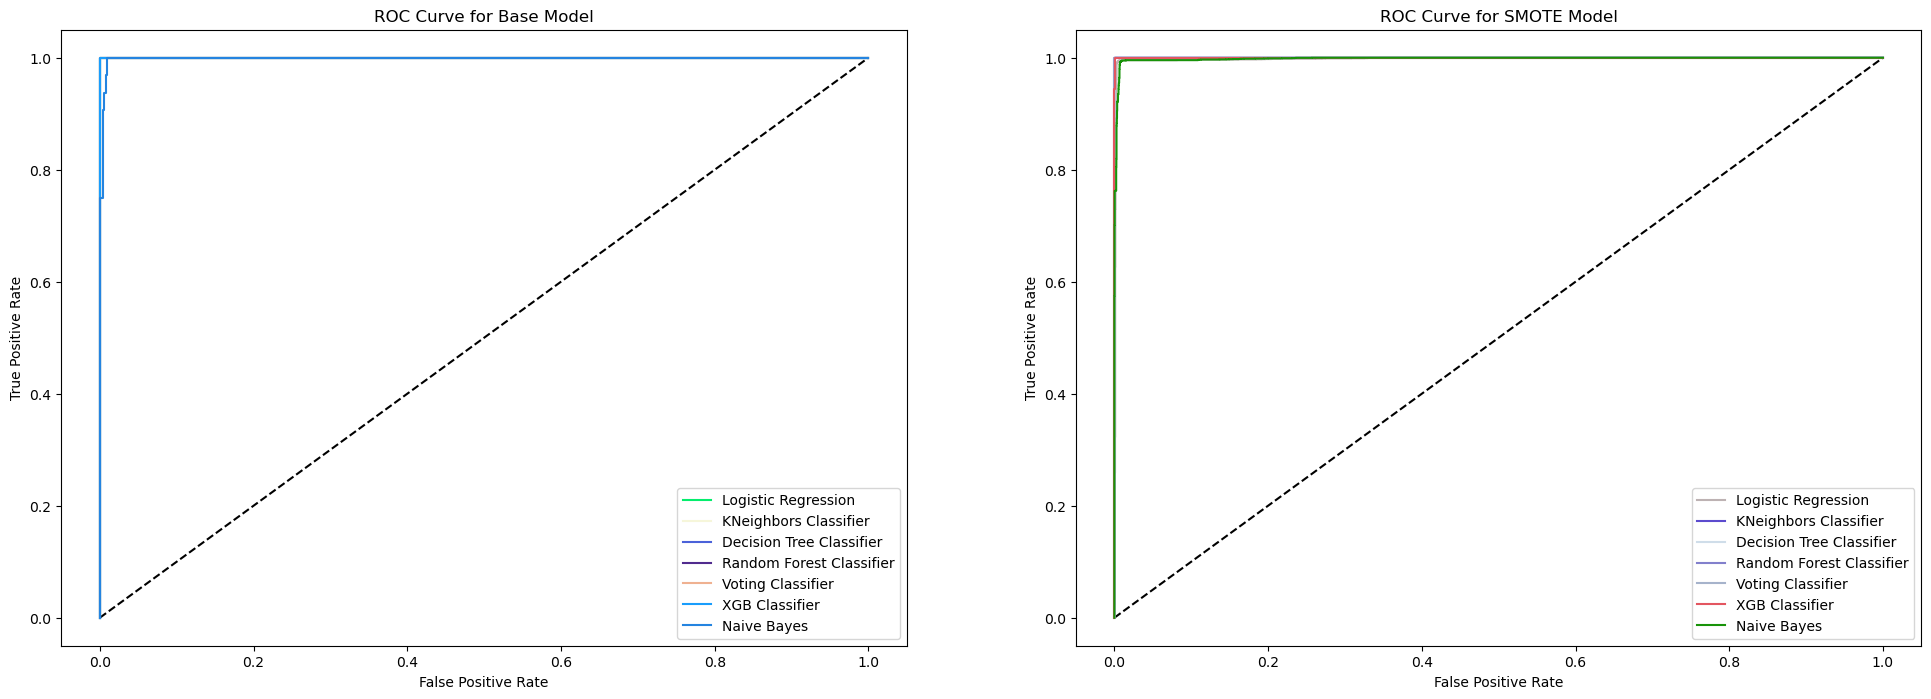

In [127]:
# empty dictionaries to hold the roc values
roc_results_base = {}
roc_results_smote = {}


# get the fpr and tpr for each set of models
for model in cm_base.model_abr:
    fpr, tpr, thresholds = roc_curve(
        cm_base.y_test, cm_base.model_predicts_proba[model][:, 1])

    roc_results_base[model] = [fpr, tpr, thresholds]

for model in cm_smote.model_abr:
    fpr, tpr, thresholds = roc_curve(
        cm_smote.y_test, cm_smote.model_predicts_proba[model][:, 1])

    roc_results_smote[model] = [fpr, tpr, thresholds]


# three subplots please
fig, ((ax0, ax1)) = plt.subplots(1, 2, figsize=(24, 8))
# fig, ((ax0, ax1)) = plt.subplots(1, 2, figsize=(15, 8))

# base model
ax0.plot([0, 1], [0, 1], 'k--')
for model in roc_results_base:
    ax0.plot(roc_results_base[model][0],
             roc_results_base[model][1], c=np.random.rand(3,), label=cm_base.model_abr[model])
ax0.set_xlabel('False Positive Rate')
ax0.set_ylabel('True Positive Rate')
ax0.legend()
ax0.set_title('ROC Curve for Base Model')

# SMOTE model
ax1.plot([0, 1], [0, 1], 'k--')
for model in roc_results_smote:
    ax1.plot(roc_results_smote[model][0],
             roc_results_smote[model][1], c=np.random.rand(3,), label=cm_smote.model_abr[model])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')

ax1.legend()
ax1.set_title('ROC Curve for SMOTE Model')


In [105]:
# table headers and a dictionary to hold the values
headers = ['AUC (Base Model)', 'AUC (SMOTE Model)']
# headers = ['AUC (Base Model)', 'AUC (RUS Model)']
tbl_data_dict = {}

# loop over the classifier models and then their keys abbreviated keys
for model in [cm_base, cm_smote]:
# for model in [cm_base, cm_rus]:
    for k in model.model_abr:
        auc = roc_auc_score(model.y_test, model.model_predicts_proba[k][:, 1])
        tbl_data_dict.setdefault(model.model_abr[k], []).append(auc)

# create the table data from the dictionary created above
# tabulate doesn't take table data in the form of dictionary created above
tbldata = []
for k, v in tbl_data_dict.items():
    tbldata.append([k] + v)

print(tabulate(tbldata, headers=headers, tablefmt='pretty'))

+--------------------------+--------------------+--------------------+
|                          |  AUC (Base Model)  | AUC (SMOTE Model)  |
+--------------------------+--------------------+--------------------+
|   Logistic Regression    |        1.0         | 0.9992226026372498 |
|  KNeighbors Classifier   | 0.983820564516129  | 0.9989320803075609 |
| Decision Tree Classifier | 0.9998924731182796 | 0.9995728321230243 |
| Random Forest Classifier |        1.0         |        1.0         |
|    Voting Classifier     |        1.0         |        1.0         |
|      XGB Classifier      | 0.9999999999999999 | 0.9999442764090218 |
|       Naive Bayes        | 0.9980645161290322 | 0.9975916106489404 |
+--------------------------+--------------------+--------------------+


In [128]:
df_auc = pd.DataFrame(['Base', 'SMOTE'], columns=['Dataset Type']).merge(
    right=pd.DataFrame(tbl_data_dict), left_index=True, right_index=True)
df_auc

,Dataset Type,Logistic Regression,KNeighbors Classifier,Decision Tree Classifier,Random Forest Classifier,Voting Classifier,XGB Classifier,Naive Bayes
0,Base,1.000000,0.983821,0.999892,1.0,1.0,1.000000,0.998065
1,SMOTE,0.999223,0.998932,0.999573,1.0,1.0,0.999944,0.997592


In [129]:
df_auc.melt(id_vars=['Dataset Type'], var_name='Model', value_name='AUC')

,Dataset Type,Model,AUC
0,Base,Logistic Regression,1.000000
1,SMOTE,Logistic Regression,0.999223
2,Base,KNeighbors Classifier,0.983821
3,SMOTE,KNeighbors Classifier,0.998932
4,Base,Decision Tree Classifier,0.999892
5,SMOTE,Decision Tree Classifier,0.999573
6,Base,Random Forest Classifier,1.000000
7,SMOTE,Random Forest Classifier,1.000000
8,Base,Voting Classifier,1.000000
9,SMOTE,Voting Classifier,1.000000


Text(0.5, 1.0, 'AUC for Models')

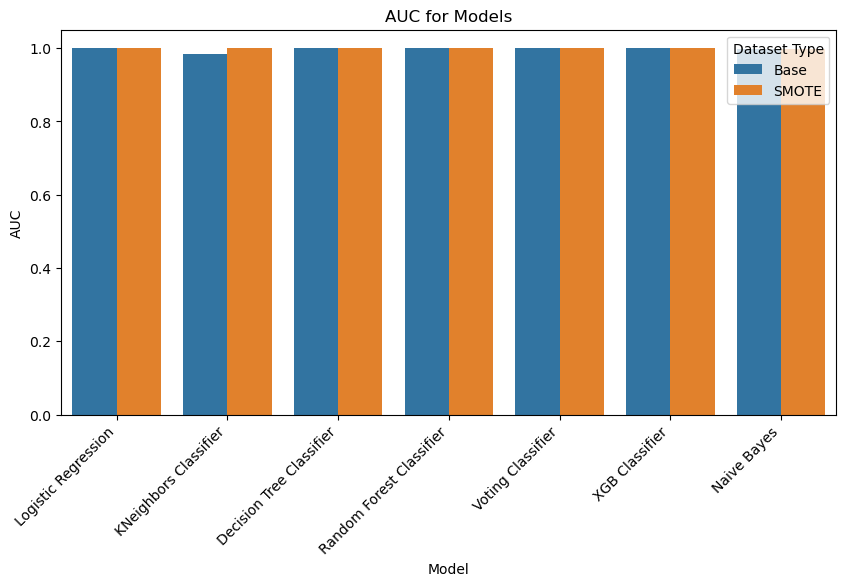

In [130]:
fig, axes = plt.subplots(figsize=(10, 5))
ax = sns.barplot(df_auc.melt(id_vars=['Dataset Type'], var_name='Model',
                 value_name='AUC'), x='Model', y='AUC', hue='Dataset Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_title('AUC for Models')

Due to the depth of events, the models make overfitting. So it will try to use these steps again after drop the depth 

# Improve Models

In [138]:
xi=data_LE.drop(labels=['Type','Depth'],axis=1)
#x = data.drop('type', axis=1)
yi = data_LE['Type']
# oversampling using SMOTE
smotei = SMOTE(random_state=0)
x_smotei, y_smotei = smote.fit_resample(xi, yi)
counteri = Counter(y)
print(counteri)
counteri = Counter(y_smote)
print(counter)
print(xi.shape)
print(x_smotei.shape)
# create a new dataframe for SMOTE
df_smotei = x_smotei.copy(deep=True)
df_smotei['type'] = y_smotei
df_smotei

Counter({0: 23232, 1: 175})
Counter({0: 23232, 1: 23232})
(23407, 7)
(46464, 7)


,Latitude,Longitude,Magnitude,Magnitude Error,Azimuthal Gap,Horizontal Distance,Root Mean Square,type
0,14680,16282,28,100,1109,1448,190,0
1,11585,13415,19,100,1109,1448,190,0
2,4819,2000,31,100,1109,1448,190,0
3,344,7644,19,100,1109,1448,190,0
4,13394,13045,19,100,1109,1448,190,0
...,...,...,...,...,...,...,...,...
46459,19156,9563,15,100,1109,1448,102,1
46460,17086,3453,21,90,1089,1448,53,1
46461,19216,9651,25,100,1109,1448,190,1
46462,19155,9584,28,100,1109,1448,98,1


In [139]:
x_train_basei, x_test_basei, y_train_basei, y_test_basei = train_test_split(
    xi, yi, test_size=ts, random_state=rs)
x_train_smotei, x_test_smotei, y_train_smotei, y_test_smotei = train_test_split(
    x_smotei, y_smotei, test_size=ts, random_state=rs)

In [140]:
# create a ClassifierModels object for the base dataset
cm_basei = ClassifierModels(
    dataD, x_train_basei, y_train_basei, x_test_basei, y_test_basei)

############################################################
#################### Loading dataframe #####################
############################################################
####### Getting best parameters to create our models #######
############################################################
############################################################
################### Logistic Regression ####################
############################################################
+++++ Creating and fitting the Logistic Regression model using its default parameters...
############################################################
################## KNeighbors Classifier ###################
############################################################
+++++ Creating and fitting the KNeighbors Classifier model using its default parameters...
############################################################
################# Decision Tree Classifier #################
###########################

In [141]:
# create a ClassifierModels object for the SMOTE dataset
cm_smotei = ClassifierModels(
    df_smotei, x_train_smotei, y_train_smotei, x_test_smotei, y_test_smotei)

############################################################
#################### Loading dataframe #####################
############################################################
####### Getting best parameters to create our models #######
############################################################
############################################################
################### Logistic Regression ####################
############################################################
+++++ Creating and fitting the Logistic Regression model using its default parameters...
############################################################
################## KNeighbors Classifier ###################
############################################################
+++++ Creating and fitting the KNeighbors Classifier model using its default parameters...
############################################################
################# Decision Tree Classifier #################
###########################

In [142]:
# save models
for m in [cm_basei, cm_smotei]:
    if m == cm_basei:
        suffix = '_base'
    elif m == cm_smotei:
        suffix = '_smote'
    
    for m_key in m.models:
        filename = m_key + suffix + '.mdl'
        joblib.dump(m.models[m_key], filename)

Base Model Performance:
+--------------------------+--------------------+--------------------+--------------------+--------------------+
|                          |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+--------------------------+--------------------+--------------------+--------------------+--------------------+
|   Logistic Regression    | 0.9918838103374626 | 0.9863686308958941 | 0.9918838103374626 | 0.989118532719108  |
|  KNeighbors Classifier   | 0.9995728321230244 | 0.9995728321230244 | 0.9995728321230244 | 0.9995728321230244 |
| Decision Tree Classifier | 0.9995728321230244 | 0.9995728321230244 | 0.9995728321230244 | 0.9995728321230244 |
| Random Forest Classifier |        1.0         |        1.0         |        1.0         |        1.0         |
|    Voting Classifier     | 0.9995728321230244 | 0.9995728321230244 | 0.9995728321230244 | 0.9995728321230244 |
|      XGB Classifier      | 0.9997864160615122 | 0.9997928883020724 | 0

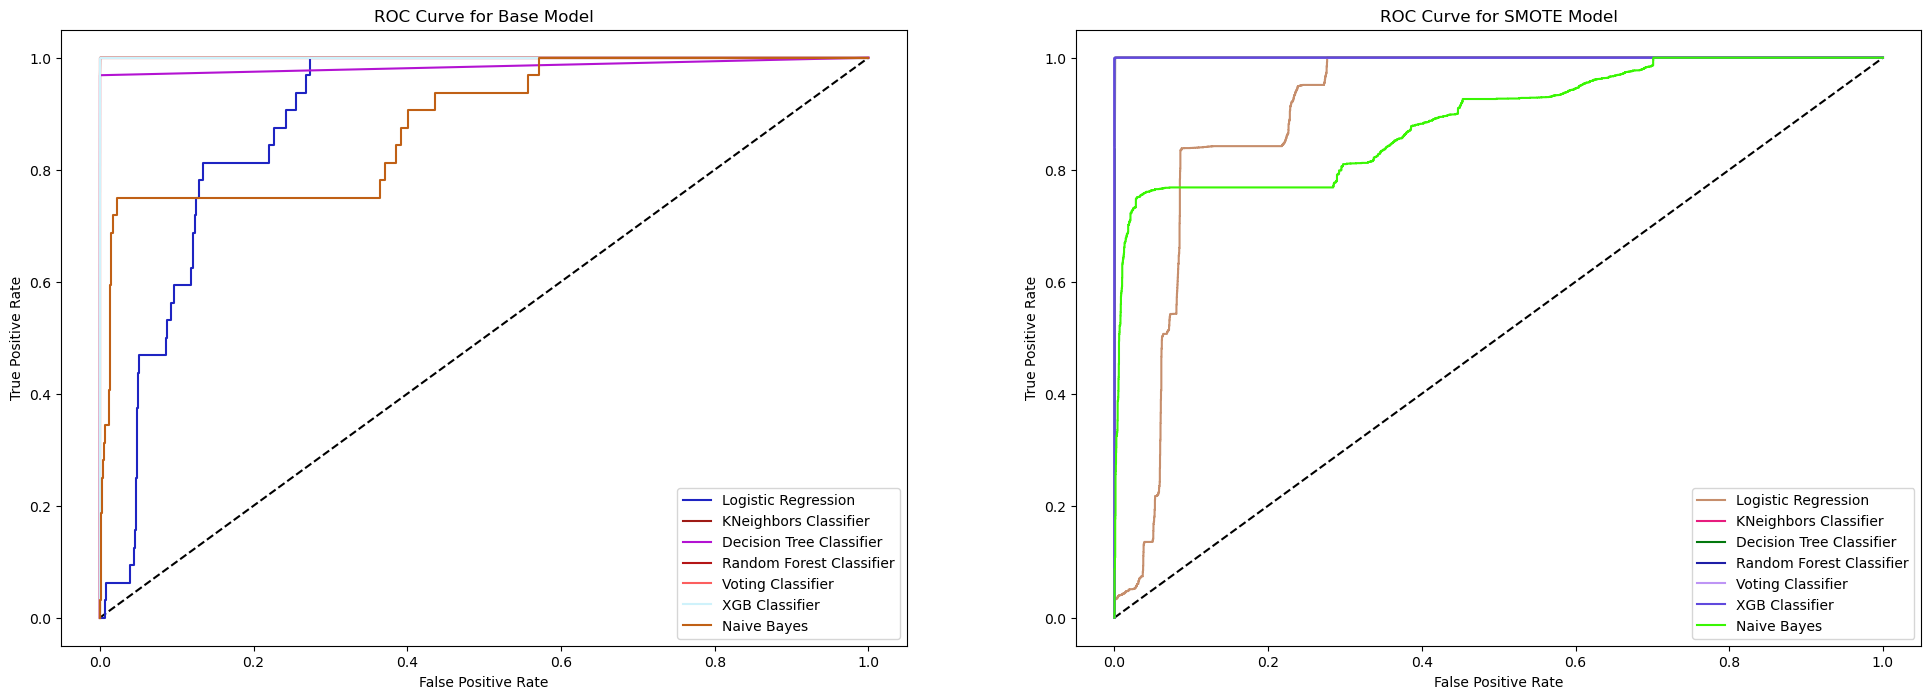

In [147]:
#Model Performance
print('Base Model Performance:\n', cm_basei.show_performance(), sep='')
print('SMOTE Model Performance:\n', cm_smotei.show_performance(), sep='')
#ROC
# empty dictionaries to hold the roc values
roc_results_basei = {}
roc_results_smotei = {}


# get the fpr and tpr for each set of models
for model in cm_basei.model_abr:
    fpr, tpr, thresholds = roc_curve(
        cm_basei.y_test, cm_basei.model_predicts_proba[model][:, 1])

    roc_results_basei[model] = [fpr, tpr, thresholds]

for model in cm_smote.model_abr:
    fpr, tpr, thresholds = roc_curve(
        cm_smotei.y_test, cm_smotei.model_predicts_proba[model][:, 1])

    roc_results_smotei[model] = [fpr, tpr, thresholds]


# three subplots please
fig, ((ax0, ax1)) = plt.subplots(1, 2, figsize=(24, 8))
# fig, ((ax0, ax1)) = plt.subplots(1, 2, figsize=(15, 8))

# base model
ax0.plot([0, 1], [0, 1], 'k--')
for model in roc_results_basei:
    ax0.plot(roc_results_basei[model][0],
             roc_results_basei[model][1], c=np.random.rand(3,), label=cm_basei.model_abr[model])
ax0.set_xlabel('False Positive Rate')
ax0.set_ylabel('True Positive Rate')
ax0.legend()
ax0.set_title('ROC Curve for Base Model')

# SMOTE model
ax1.plot([0, 1], [0, 1], 'k--')
for model in roc_results_smotei:
    ax1.plot(roc_results_smotei[model][0],
             roc_results_smotei[model][1], c=np.random.rand(3,), label=cm_smotei.model_abr[model])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')

ax1.legend()
ax1.set_title('ROC Curve for SMOTE Model')

# AUC
# table headers and a dictionary to hold the values
headers = ['AUC (Base Model)', 'AUC (SMOTE Model)']
# headers = ['AUC (Base Model)', 'AUC (RUS Model)']
tbl_data_dict = {}

# loop over the classifier models and then their keys abbreviated keys
for model in [cm_basei, cm_smotei]:
# for model in [cm_base, cm_rus]:
    for k in model.model_abr:
        auc = roc_auc_score(model.y_test, model.model_predicts_proba[k][:, 1])
        tbl_data_dict.setdefault(model.model_abr[k], []).append(auc)

# create the table data from the dictionary created above
# tabulate doesn't take table data in the form of dictionary created above
tbldata = []
for k, v in tbl_data_dict.items():
    tbldata.append([k] + v)

print(tabulate(tbldata, headers=headers, tablefmt='pretty'))

These models are more real

# Deep learning 

##  Import package

In [131]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [154]:
model = keras.models.Sequential([
    keras.layers.BatchNormalization(input_dim = 8),
    keras.layers.Dense(10, activation = 'relu'),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(5, activation = 'relu'),

    keras.layers.BatchNormalization(),

    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation = 'sigmoid'),
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 10)                90        
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 5)                 55        
                                                                 
 batch_normalization_5 (Batc  (None, 5)                20        
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 5)                

In [150]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)
L_R_sch = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [158]:
#opt = tf.keras.optimizers.SGD(learning_rate=0.001)
opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",)
model.compile(optimizer = "Adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'] )
model.fit(x_smote,y_smote ,  validation_split = 0.1, epochs = 50 , callbacks=[L_R_sch]  ) #, callbacks = [early_stop]

Epoch 1/50
1307/1307 [==============================] - 6s 4ms/step - loss: 0.5207 - accuracy: 0.8368 - val_loss: 0.0788 - val_accuracy: 0.9959 - lr: 0.0010
Epoch 2/50
1307/1307 [==============================] - 5s 3ms/step - loss: 0.0790 - accuracy: 0.9795 - val_loss: 0.0261 - val_accuracy: 0.9951 - lr: 0.0010
Epoch 3/50
1307/1307 [==============================] - 5s 3ms/step - loss: 0.0561 - accuracy: 0.9857 - val_loss: 0.0184 - val_accuracy: 0.9948 - lr: 0.0010
Epoch 4/50
1307/1307 [==============================] - 4s 3ms/step - loss: 0.0490 - accuracy: 0.9874 - val_loss: 0.0201 - val_accuracy: 0.9948 - lr: 0.0010
Epoch 5/50
1307/1307 [==============================] - 5s 4ms/step - loss: 0.0462 - accuracy: 0.9881 - val_loss: 0.0292 - val_accuracy: 0.9925 - lr: 0.0010
Epoch 6/50
1307/1307 [==============================] - 4s 3ms/step - loss: 0.0432 - accuracy: 0.9901 - val_loss: 0.0257 - val_accuracy: 0.9938 - lr: 0.0010
Epoch 7/50
1307/1307 [==============================] - 4s

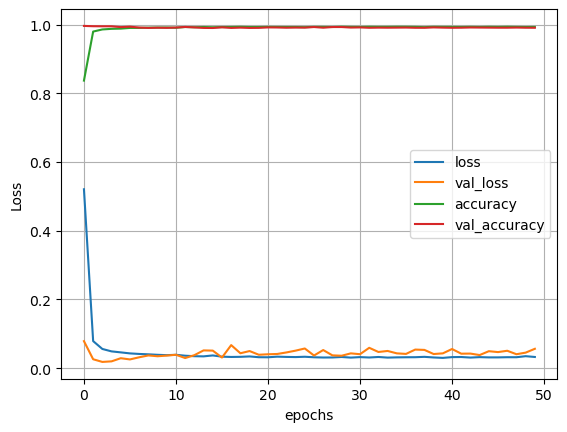

In [159]:
# loss
plt.plot(model.history.history['loss'], label = 'loss')
plt.plot(model.history.history['val_loss'], label = 'val_loss')

plt.xlabel('epochs')
plt.ylabel('Loss')

plt.legend()
plt.grid(True)

# Accuracy
plt.plot(model.history.history['accuracy'], label = 'accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('epochs')
plt.ylabel('Loss')

plt.legend()
plt.grid(True)

In [162]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer = "SGD" , loss = 'binary_crossentropy' , metrics = ['accuracy'] )
model.fit(x_smote,y_smote ,  validation_split = 0.1, epochs = 50 , callbacks=[L_R_sch]  ) #, callbacks = [early_stop]

Epoch 1/50
1307/1307 [==============================] - 6s 3ms/step - loss: 0.0304 - accuracy: 0.9938 - val_loss: 0.0617 - val_accuracy: 0.9914 - lr: 0.0100
Epoch 2/50
1307/1307 [==============================] - 4s 3ms/step - loss: 0.0328 - accuracy: 0.9931 - val_loss: 0.0339 - val_accuracy: 0.9912 - lr: 0.0100
Epoch 3/50
1307/1307 [==============================] - 4s 3ms/step - loss: 0.0319 - accuracy: 0.9931 - val_loss: 0.0462 - val_accuracy: 0.9901 - lr: 0.0100
Epoch 4/50
1307/1307 [==============================] - 4s 3ms/step - loss: 0.0335 - accuracy: 0.9922 - val_loss: 0.0895 - val_accuracy: 0.9901 - lr: 0.0100
Epoch 5/50
1307/1307 [==============================] - 4s 3ms/step - loss: 0.0319 - accuracy: 0.9928 - val_loss: 0.0403 - val_accuracy: 0.9929 - lr: 0.0100
Epoch 6/50
1307/1307 [==============================] - 4s 3ms/step - loss: 0.0310 - accuracy: 0.9936 - val_loss: 0.0606 - val_accuracy: 0.9901 - lr: 0.0100
Epoch 7/50
1307/1307 [==============================] - 4s

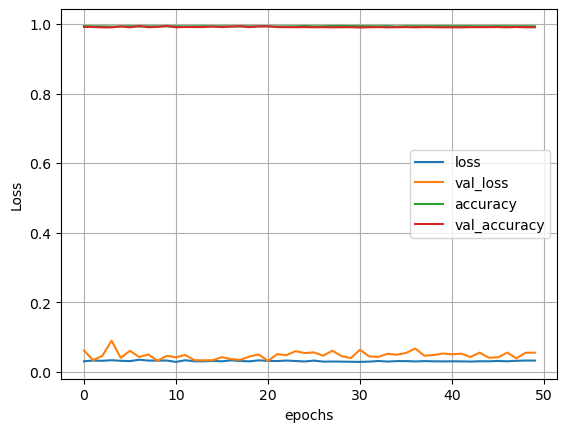

In [163]:
# loss
plt.plot(model.history.history['loss'], label = 'loss')
plt.plot(model.history.history['val_loss'], label = 'val_loss')

plt.xlabel('epochs')
plt.ylabel('Loss')

plt.legend()
plt.grid(True)

# Accuracy
plt.plot(model.history.history['accuracy'], label = 'accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('epochs')
plt.ylabel('Loss')

plt.legend()
plt.grid(True)